#Q1

In [53]:
import numpy as np
from numpy import ones
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
from numpy import ndarray
from numpy import genfromtxt
from numpy import mean
from numpy.random import randn
from scipy.integrate import quad
import sys
np.set_printoptions(precision=4)
np.set_printoptions(threshold=30)
np.set_printoptions(linewidth=300)
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)

In [54]:
#Get data from csv's
X = genfromtxt('stock_prediction_data.csv', delimiter=',')
y = genfromtxt('stock_price.csv', delimiter=',')
y = y.reshape(-1,1)
n = X.shape[0]


In [55]:
#Split into train (0.8), test(0.1), and validation(0.1)
import numpy as np
from numpy import reshape, arange, array, hstack
from sklearn.model_selection import train_test_split

X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.2, random_state=42)

X_val,X_test,y_val,y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

Preprocessing

In [56]:
#Preprocessing
#use standard scaler to normalize the data, use scaler fitted on training to ensure val and test aren't used to train model
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

**Linear**

In [57]:
#LINEAR
#making linear phis for training and validation
def linear_feature_map(X):
    return np.hstack((ones((X.shape[0], 1)),X))
phi_linear_train = linear_feature_map(X_train)
phi_linear_val = linear_feature_map(X_val)

#MSE functions
def mse(y, y_hat):
    """
    Calculates the Mean Squared Error (MSE) between actual and predicted values.

    Parameters:
    - y: ndarray, Actual target values.
    - y_hat: ndarray, Predicted values by the model.

    Returns:
    - float: The mean squared error between actual and predicted values.
    """
    return np.mean((y - y_hat)**2)

#Predict function
def predict(phi, w):
    """
    Predicts the target values using the linear model.

    Parameters:
    - Φ: ndarray, The feature matrix. (Phi)
    - w: ndarray, The weights vector.

    Returns:
    - ndarray: Predicted values.
    """
    return phi.dot(w)

#Linear Regression Gradient Descent
def f_grad(w, phi, y):
  advanced_approach = True
  if advanced_approach:
    return (2/n)*phi.T.dot(phi.dot(w) - y)
  else:
    f0 = np.zeros((d,1))
    for phii,yi in zip(phi,y):
      phii = np.reshape(phii,(d,1))
      f0 += (w.T.dot(phii) - yi)*phii
  return 2/n*f0

def gradient_descent(phi, y, alpha= 0.01, num_iter=10000):
  n, m = phi.shape
  w = np.zeros((m, 1))
  mse_list = []
  for i in range(num_iter):
    gradient = f_grad(w, phi, y)
    # Checking for convergence (See note below)
    if np.all(np.abs(gradient) < 1e-5) or np.isnan(gradient).any():
        break

    # Check for gradient explosion (See note below)
    if np.isinf(gradient).any():
        print (gradient)
        raise ValueError("Gradient exploded")
    w = w - alpha*f_grad(w, phi, y)
  return w

#Linear Regression closed form
def closed_form_find_w(phi, y):
  closed_form_w = np.linalg.inv((phi.T.dot(phi))).dot((phi.T).dot(y))
  return closed_form_w


#Function Calls

#Sklearn
sk_lr = LinearRegression()
sk_lr.fit(X_train,y_train.flatten()) # y is 2D, but scikit-learn expects 1D
predictions = sk_lr.predict(X_train).reshape(-1,1)
print(f"SKLearn Linear Train MSE: {mse(y_train, predictions)}")
predictions_val = sk_lr.predict(X_val).reshape(-1,1)
print(f"SKLearn Linear Validation MSE: {mse(y_val, predictions_val)}")

#Gradient Descent
linear_gd_w = gradient_descent(phi_linear_train, y_train, 0.001, 1000000)
pred_train = predict(phi_linear_train, linear_gd_w)
print(f"My Linear Grad Descent Train MSE: {mse(y_train, pred_train)}")
pred_val = predict(phi_linear_val, linear_gd_w)
print(f"My Linear Grad Descent Validation MSE: {mse(y_val, pred_val)}")

#Closed Form
closed_form_w = closed_form_find_w(phi_linear_train, y_train)
pred_train = predict(phi_linear_train, closed_form_w)
print(f"My Linear Closed Form Train MSE: {mse(y_train, pred_train)}")
pred_val = predict(phi_linear_val, closed_form_w)
print(f"My Linear Closed Form Validation MSE: {mse(y_val, pred_val)}")


SKLearn Linear Train MSE: 0.041752878453990096
SKLearn Linear Validation MSE: 0.049312459369591395
My Linear Grad Descent Train MSE: 0.04175287865101813
My Linear Grad Descent Validation MSE: 0.04931110151298098
My Linear Closed Form Train MSE: 0.041752878453990075
My Linear Closed Form Validation MSE: 0.04931245936959359


#Q2

In [58]:
#Polynomial
#making linear phis for training and validation

phi_poly_train = PolynomialFeatures(degree=2, include_bias=True).fit_transform(X_train)
phi_poly_val = PolynomialFeatures(degree=2, include_bias=True).fit_transform(X_val)

#MSE functions
def mse(y, y_hat):
    """
    Calculates the Mean Squared Error (MSE) between actual and predicted values.

    Parameters:
    - y: ndarray, Actual target values.
    - y_hat: ndarray, Predicted values by the model.

    Returns:
    - float: The mean squared error between actual and predicted values.
    """
    return np.mean((y - y_hat)**2)

#Predict function
def predict(phi, w):
    """
    Predicts the target values using the linear model.

    Parameters:
    - Φ: ndarray, The feature matrix. (Phi)
    - w: ndarray, The weights vector.

    Returns:
    - ndarray: Predicted values.
    """
    return phi.dot(w)

#Linear Regression Gradient Descent
def f_grad(w, phi, y):
  n, d = phi.shape
  advanced_approach = True
  if advanced_approach:
    return (2/n)*phi.T.dot(phi.dot(w) - y)
  else:
    f0 = np.zeros((phi.shape[1],1))
    for phii,yi in zip(phi,y):
      phii = np.reshape(phii,(d,1))
      f0 += (w.T.dot(phii) - yi)*phii
  return 2/n*f0

def gradient_descent(phi, y, num_iter=1000, alpha= 0.01):
  n, m = phi.shape
  w = np.zeros((m, 1))
  for i in range(num_iter):
    gradient = f_grad(w, phi, y)
    if np.all(np.abs(gradient) < 1e-5) or np.isnan(gradient).any():
        break
    if np.isinf(gradient).any():
        raise ValueError("Gradient exploded")
    w -= alpha * gradient
  return w



#Linear Regression closed form
def closed_form_find_w(phi, y):
  closed_form_w = np.linalg.inv((phi.T.dot(phi))).dot((phi.T).dot(y))
  return closed_form_w


#Function Calls
#Sklearn
sk_lr = LinearRegression()
sk_lr.fit(X_train,y_train.flatten()) # y is 2D, but scikit-learn expects 1D
predictions = sk_lr.predict(X_train).reshape(-1,1)
print(f"SKLearn Linear Train MSE: {mse(y_train, predictions)}")
predictions_val = sk_lr.predict(X_val).reshape(-1,1)
print(f"SKLearn Linear Validation MSE: {mse(y_val, predictions_val)}")

#Gradient Descent
poly_gd_w = gradient_descent(phi_poly_train, y_train, 10000, 0.01)
pred_train = predict(phi_poly_train, poly_gd_w)
print(f"My Polynomial Grad Descent Train MSE: {mse(y_train, pred_train)}")
pred_val = predict(phi_poly_val, poly_gd_w)
print(f"My Polynomial Grad Descent Validation MSE: {mse(y_val, pred_val)}")

#Closed Form
closed_form_w = closed_form_find_w(phi_poly_train, y_train)
pred_train = predict(phi_poly_train, closed_form_w)
print(f"My Polynomial Closed Form Train MSE: {mse(y_train, pred_train)}")
pred_val = predict(phi_poly_val, closed_form_w)
print(f"My Polynomial Closed Form Validation MSE: {mse(y_val, pred_val)}")

SKLearn Linear Train MSE: 0.041752878453990096
SKLearn Linear Validation MSE: 0.049312459369591395
My Polynomial Grad Descent Train MSE: 0.03166484579937739
My Polynomial Grad Descent Validation MSE: 0.06770203865387388
My Polynomial Closed Form Train MSE: 0.03166484523384305
My Polynomial Closed Form Validation MSE: 0.06770356901834401


#Q3

In [59]:
#Closed Form
x = np.array([[0, 1, 2, 3]]).T
y = np.array([[1, 0, 2, -2]]).T
phi_linear = linear_feature_map(x)
closed_form_w = closed_form_find_w(phi_linear, y)
print ('a is equal to ', closed_form_w[1], 'and b is equal to ', closed_form_w[0])


a is equal to  [-0.7] and b is equal to  [1.3]


#Q6

In [60]:
def generate_histogramavg(name, xlabel, ylabel, x):
  X = genfromtxt(x, delimiter=',')
  plt.title(name)  # Add title to the plot
  plt.xlabel(xlabel)  # Label for x-axis
  plt.ylabel(ylabel)  # Label for y-axis
  n, bins, patches = plt.hist(X,20, facecolor = 'blue', alpha= 0.7)
  plt.show()
  average = mean(X)
  print('the average of the', name, 'dataset is', average)

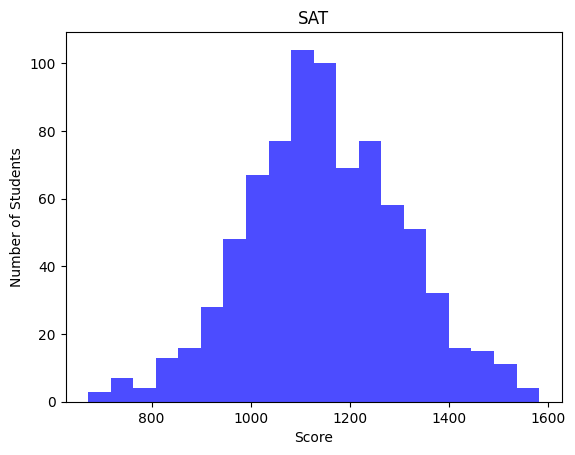

the average of the SAT dataset is 1147.82875


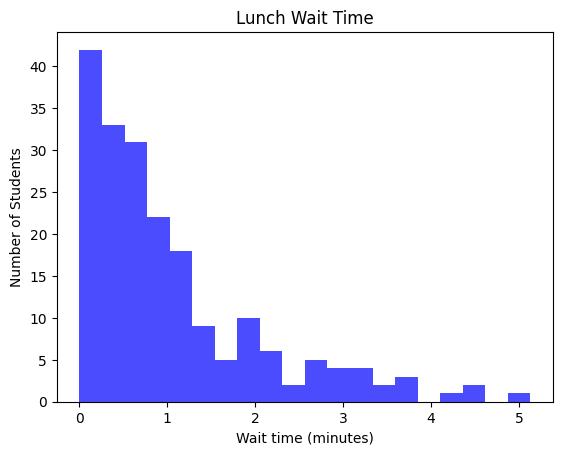

the average of the Lunch Wait Time dataset is 1.0405


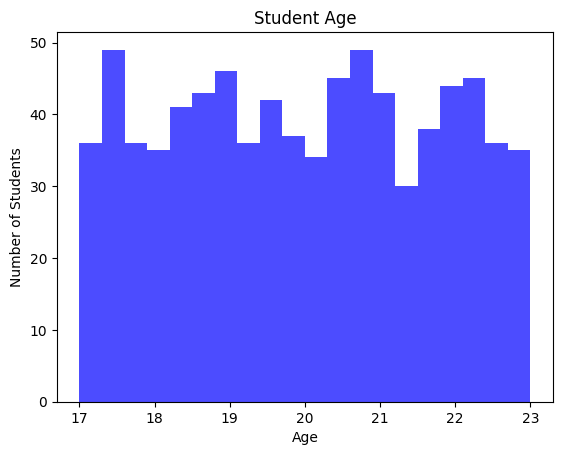

the average of the Student Age dataset is 19.931625
The probability that someone scored above 1200 is:  0.3575
The probability that you wait above 5 mins is:  0.005
The probability that somone is younger than 19 is:  0.34125


In [61]:
SAT = genfromtxt('SAT.csv', delimiter=',')
generate_histogramavg('SAT', 'Score', 'Number of Students', 'SAT.csv')
LUNCH = genfromtxt('lunch_wait_time.csv', delimiter=',')
generate_histogramavg('Lunch Wait Time', 'Wait time (minutes)', 'Number of Students', 'lunch_wait_time.csv')
AGE = genfromtxt('student_age.csv', delimiter=',')
generate_histogramavg('Student Age', 'Age', 'Number of Students','student_age.csv')
#3 problem
SAT_above_1200 = np.count_nonzero(SAT > 1200)
Total_SAT = SAT.size
result = SAT_above_1200 / Total_SAT
print('The probability that someone scored above 1200 is: ', result)
#4 problem
LUNCH_above_5 = np.count_nonzero(LUNCH > 5)
Total_LUNCH = LUNCH.size
result = LUNCH_above_5 / Total_LUNCH
print('The probability that you wait above 5 mins is: ', result)
#5 problem
AGE_less_than_19 = np.count_nonzero(AGE < 19)
Total_AGE = AGE.size
result = AGE_less_than_19 / Total_AGE
print('The probability that somone is younger than 19 is: ', result)

#Q7

In [62]:
#1
import numpy as np
from scipy.integrate import quad
from scipy.optimize import fsolve

# Define the function to integrate
def f(x):
    return x**2 - x + 1

# Compute the integral from 0 to b and solve for b
def integral_equation(b):
    result, err = quad(f, 0, b)
    return result - 1

# Solve for b
b_solution = fsolve(integral_equation, 1)[0]  # Initial guess of 1
print(b_solution)

1.1536528590388293


In [63]:
!jupyter nbconvert --to html /content/HW3.ipynb

[NbConvertApp] Converting notebook /content/HW3.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 385586 bytes to /content/HW3.html
